In [19]:
import feets
import os 
import math 
import numpy as np 
import argparse 
from astropy.table import Table, Column, join
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.vizier import Vizier
import sys
import hdbscan
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
fft = False
import pickle
import matplotlib.pylab as pylab
from astropy.table import Table, Column, join 
import glob

In [23]:
## get light curves 

## folder - LC_set1_files (columns: hjd, mag, emag)
## folder - LC_set2_files (columns: mjd, mag, emag, uplim)
path = '/Users/swebb/Documents/ISYA_2023/notebooks/LC_set1_files/'


In [24]:
file_list = os.listdir(path)
file_list       

['exampledata_66.ascii',
 'exampledata_23.ascii',
 'exampledata_42.ascii',
 'exampledata_3.ascii',
 'exampledata_38.ascii',
 'exampledata_1.ascii',
 'exampledata_40.ascii',
 'exampledata_64.ascii',
 'exampledata_21.ascii',
 'exampledata_59.ascii',
 'exampledata_60.ascii',
 'exampledata_25.ascii',
 'exampledata_18.ascii',
 'exampledata_5.ascii',
 'exampledata_44.ascii',
 'exampledata_46.ascii',
 'exampledata_7.ascii',
 'exampledata_62.ascii',
 'exampledata_27.ascii',
 'features_set_extra.csv',
 'exampledata_41.ascii',
 'exampledata_39.ascii',
 'exampledata_58.ascii',
 'exampledata_20.ascii',
 'exampledata_65.ascii',
 'exampledata_22.ascii',
 'exampledata_67.ascii',
 'exampledata_2.ascii',
 'exampledata_43.ascii',
 'exampledata_6.ascii',
 'exampledata_47.ascii',
 'exampledata_26.ascii',
 'exampledata_63.ascii',
 'exampledata_19.ascii',
 'exampledata_24.ascii',
 'exampledata_61.ascii',
 'exampledata_45.ascii',
 'exampledata_4.ascii',
 'exampledata_8.ascii',
 'exampledata_31.ascii',
 'exam

exampledata_60.ascii


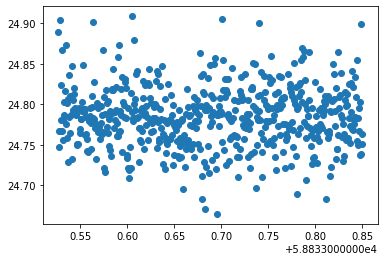

In [25]:
## list at a test lightcurve 

print(file_list[10])

hjd, mag, emag = np.loadtxt(path+file_list[10], unpack = True, skiprows=1)
plt.scatter(hjd, mag)
         

# What features do you think could describe the light curves for ML? 

Papers to consider reading: 

https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.2089W/abstract 
https://ui.adsabs.harvard.edu/abs/2011ApJ...735...68K/abstract 
https://ui.adsabs.harvard.edu/abs/2016A%26A...587A..18K/abstract
https://ui.adsabs.harvard.edu/abs/2015arXiv150600010N/abstract
https://ui.adsabs.harvard.edu/abs/2013ApJ...777...83P/abstract

Types of features which have been used for light curves: 

Autocor_length,
Beyond1Std,
CAR_sigma, 
CAR_mean, 
CAR_tau, 
Con, 
Eta_e, 
LinearTrend,
MaxSlope, 
Mean, 
Meanvariance, 
MedianAbsDev, 
MedianBRP, 
PairSlopeTrend, 
PercentAmplitude, 
Q31, 
Rcs,
Skew, 
SlottedA_length,
SmallKurtosis,
Std, 
StetsonK_AC, 
Amplitudes, 
VariabilityIndex, 
hl_ratio,
amp1_val,
amp_2_1_ratio,
amp_3_1_ratio, 
phase_2_1_ratio, 
phase_3_1_ratio, 


In [ ]:
used_lcs = []
filenames = []
LC_name = []   
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean = []
CAR_tau =[]
Con =[]
Eta_e = []
LinearTrend = []
MaxSlope =[]
Mean = []
Meanvariance = []
MedianAbsDev =[]
MedianBRP =[]
PairSlopeTrend =[]
PercentAmplitude =[]
Q31 =[]
Rcs =[]
Skew =[]
SlottedA_length =[]
SmallKurtosis =[]
Std = []
StetsonK_AC = []
Amplitudes = []
VariabilityIndex = []
hl_ratio = []
amp1_val = []
amp_2_1_ratio = []
amp_3_1_ratio = []
phase_2_1_ratio = []
phase_3_1_ratio = []

for filename in file_list: 
        if filename.endswith('.ascii'):
            try:
                hjd, mag, emag = np.loadtxt(path + filename, unpack = True, skiprows=1)
            except: 
                print('FILE EMPTY)')
            sum_mag = np.sum(mag)
            # We don't won't to work with light curves with no values so we 
            # should filter them out before we get the features
            if sum_mag == 0:
                lc_with_only_zeros.append(filename)
            elif sum_mag != 0:
                used_lcs.append(filename)
            clean_hjd = []
            clean_mag = []
            clean_emag = []
            # Now we want to clean the light curves to remove any none numbers (someones nan's will be in the data)
            for l,m,n in zip(hjd,mag, emag):
                if m != 0:
                    if m != 0:
                        clean_hjd.append(l)
                        clean_mag.append(m)
                        clean_emag.append(n)
                    elif m != float: 
                        pass 
                    
            # ---  The feets package needs at least 3 data points  
            if len(clean_hjd) > 3:
                lc = np.array([clean_mag, clean_hjd, clean_emag])
                fs=feets.FeatureSpace(only=['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
                                            'CAR_tau', 'Con', 'LinearTrend', 'MaxSlope',
                                            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
                                            'PairSlopeTrend', 'PercentAmplitude', 'Q31', 'Rcs', 'Skew',
                                            'SlottedA_length', 'SmallKurtosis', 'Std',
                                            'StetsonK_AC' ])
                
                features, values = fs.extract(*lc)
                print(features, values)
                results = dict(zip(features,values))
                print(results['Autocor_length'])
                filenames.append(filename)
                Autocor_length.append(results['Autocor_length'])
                Beyond1Std.append(results['Beyond1Std'])
                CAR_sigma.append(results['CAR_sigma'])
                CAR_mean.append(results['CAR_mean'])
                CAR_tau.append(results['CAR_tau'])
                Con.append(results['Con'])
                LinearTrend.append(results['LinearTrend'])
                MaxSlope.append(results['MaxSlope'])
                Mean.append(results['Mean'])
                Meanvariance.append(results['Meanvariance'])
                MedianAbsDev.append(results['MedianAbsDev'])
                MedianBRP.append(results['MedianBRP'])
                PairSlopeTrend.append(results['PairSlopeTrend'])
                PercentAmplitude.append(results['PercentAmplitude'])
                Q31.append(results['Q31'])
                Rcs.append(results['Rcs'])
                Skew.append(results['Skew'])
                SlottedA_length.append(results['SlottedA_length'])
                SmallKurtosis.append(results['SmallKurtosis'])
                Std.append(results['Std'])
                StetsonK_AC.append(results['StetsonK_AC'])
                
                
            else: 
                print('Not enough data points')
    #put all into a mega table with each row representing a different light curve 
feature_table = Table()
feature_table['LC_name'] = filenames
feature_table['Autocor_length'] = Autocor_length
feature_table['Beyond1Std'] = Beyond1Std
feature_table['CAR_sigma'] = CAR_sigma
feature_table['CAR_mean'] = CAR_mean
feature_table['CAR_tau'] = CAR_tau
feature_table['Con'] = Con
feature_table['LinearTrend'] = LinearTrend
feature_table['MaxSlope'] = MaxSlope
feature_table['Mean'] =Mean
feature_table['Meanvariance'] =Meanvariance
feature_table['MedianAbsDev'] =MedianAbsDev
feature_table['MedianBRP'] =MedianBRP
feature_table['PairSlopeTrend'] =PairSlopeTrend
feature_table['PercentAmplitude'] =PercentAmplitude
feature_table['Q31'] =Q31
feature_table['Rcs'] =Rcs
feature_table['Skew'] =Skew
feature_table['SlottedA_length'] =SlottedA_length
feature_table['SmallKurtosis'] =SmallKurtosis
feature_table['Std'] =Std
feature_table['StetsonK_AC'] =StetsonK_AC
output =input_path+'/features_set.csv'
df = feature_table.to_pandas()
df = df.replace(np.nan, 0)
df.to_csv(output)


# Now think of some other features you can add in 

# Evlauting what features are meaninful 

In [13]:
feature_set_path = '/Users/swebb/Documents/ISYA_2023/notebooks/LC_set1_files/features_set.csv'

df = pd.read_csv(feature_set_path, delimiter=',')
df.replace([np.inf, -np.inf], 0)
df = df.replace(np.nan, 0)
print(df)
# Seperate into clean lists

LC_name = []
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean= []
CAR_tau= []
Con= []
LinearTrend= []
MaxSlope= []
Mean= []
Meanvariance= []
MedianAbsDev= []
MedianBRP= []
PairSlopeTrend= []
PercentAmplitude= []
Q31= []
Rcs= []
Skew= []
SlottedA_length= []
SmallKurtosis= []
Std= []
StetsonK_AC= []

for index, row in df.iterrows():
    LC_name.append(row.LC_name)
    Autocor_length.append(row.Autocor_length)
    Beyond1Std.append(row.Beyond1Std)
    CAR_sigma.append(row.CAR_sigma)
    CAR_mean.append(row.CAR_mean)
    CAR_tau.append(row.CAR_tau)
    Con.append(row.Con)
    LinearTrend.append(row.LinearTrend)
    MaxSlope.append(row.MaxSlope)
    Mean.append(row.Mean)
    Meanvariance.append(row.Meanvariance)
    MedianAbsDev.append(row.MedianAbsDev)
    MedianBRP.append(row.MedianBRP)
    PairSlopeTrend.append(row.PairSlopeTrend)
    PercentAmplitude.append(row.PercentAmplitude)
    Q31.append(row.Q31)
    Rcs.append(row.Rcs)
    Skew.append(row.Skew)
    SlottedA_length.append(row.SlottedA_length)
    SmallKurtosis.append(row.SmallKurtosis)
    Std.append(row.Std)
    StetsonK_AC.append(row.StetsonK_AC)
    
df = df.replace(np.nan, 0)
print(df)

    Unnamed: 0               LC_name  Autocor_length  Beyond1Std  CAR_sigma  \
0            0  exampledata_66.ascii           125.0    0.412281       10.0   
1            1  exampledata_23.ascii           122.0    0.415468       10.0   
2            2  exampledata_42.ascii           124.0    0.403169       10.0   
3            3   exampledata_3.ascii           125.0    0.422807       10.0   
4            4  exampledata_38.ascii           125.0    0.403509       10.0   
..         ...                   ...             ...         ...        ...   
65          65  exampledata_68.ascii           124.0    0.404930       10.0   
66          66  exampledata_34.ascii           125.0    0.407018       10.0   
67          67  exampledata_36.ascii           124.0    0.403169       10.0   
68          68  exampledata_12.ascii           124.0    0.397188       10.0   
69          69  exampledata_57.ascii           125.0    0.414763       10.0   

         CAR_mean  CAR_tau  Con  LinearTrend      M

In [14]:
# create dictionary for all the wanted features (change up for different requirements,
# you dont' have to use all the features :) 
dict = {'Filename': LC_name, 'Autocor_length': Autocor_length, 
        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma, 
        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con, 
        'LinearTrend': LinearTrend, 
        'MaxSlope':MaxSlope, 'Mean' : Mean, 
        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,
        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend, 
        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,
        'Skew':Skew, 'SlottedA_length' :SlottedA_length,
        'SmallKurtosis':SmallKurtosis, 'Std':Std, 
        'StetsonK_AC':StetsonK_AC}


In [15]:
#Put dictionary into a pandas datadframe with no NaNs or Infs  #
dframe = pd.DataFrame(dict)
dframe.replace('inf', 0)
dframe = dframe.replace(np.nan, 0)
print(len(dframe))
print(dframe)

70
                Filename  Autocor_length  Beyond1Std  CAR_sigma  \
0   exampledata_66.ascii           125.0    0.412281       10.0   
1   exampledata_23.ascii           122.0    0.415468       10.0   
2   exampledata_42.ascii           124.0    0.403169       10.0   
3    exampledata_3.ascii           125.0    0.422807       10.0   
4   exampledata_38.ascii           125.0    0.403509       10.0   
..                   ...             ...         ...        ...   
65  exampledata_68.ascii           124.0    0.404930       10.0   
66  exampledata_34.ascii           125.0    0.407018       10.0   
67  exampledata_36.ascii           124.0    0.403169       10.0   
68  exampledata_12.ascii           124.0    0.397188       10.0   
69  exampledata_57.ascii           125.0    0.414763       10.0   

         CAR_mean  CAR_tau  Con  LinearTrend      MaxSlope          Mean  ...  \
0   117667.376483      0.5  0.0    -0.219369           inf  58833.688241  ...   
1   117667.374741      0.5  0.

In [16]:

#Define what features to use in the clustering, don't cluster on the targert/ID names! # 
features = ['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 
            'CAR_tau', 'Con', 'LinearTrend', 
            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 
            'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length',
            'SmallKurtosis', 'Std', 'StetsonK_AC']

## Separating out the features:
x = dframe.loc[:, features].values
## Separating out the LC names:
y = dframe.loc[:,['Filename']].values
# Standardise the features
x = StandardScaler().fit_transform(x)

In [17]:
## Simple 2D component breakdown for PCA. Don't need to do this but can be helpful to see ##
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2'])
finalDf = pd.concat([principalDf, dframe[['Filename']]], axis =1)

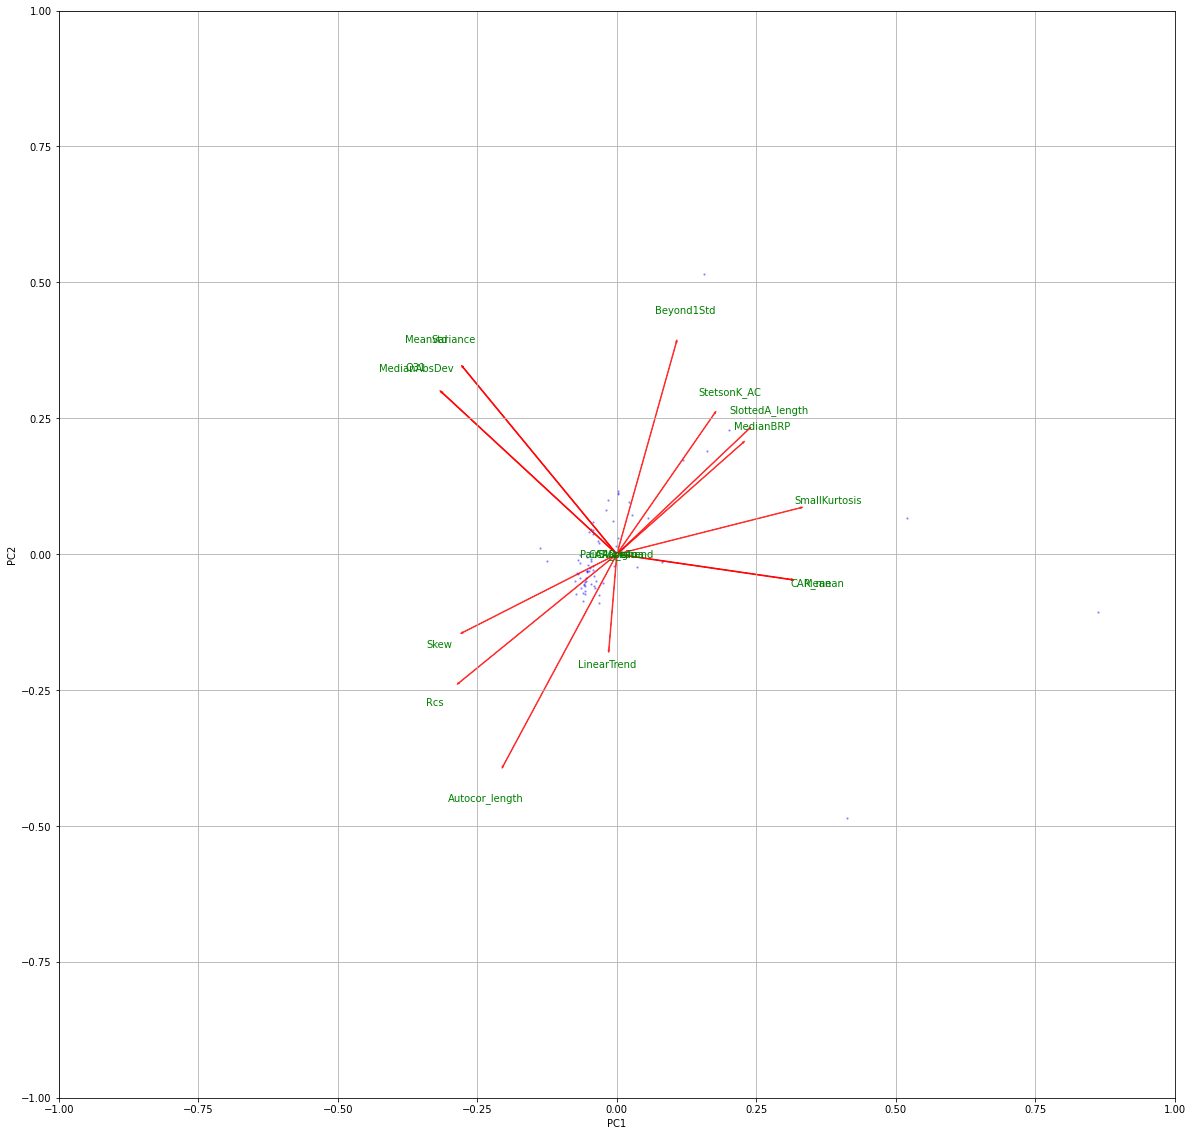

['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 'CAR_tau', 'Con', 'LinearTrend', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length', 'SmallKurtosis', 'Std', 'StetsonK_AC']


In [18]:
def myplot(score, coeff, labels=None):
        xs = score[:,0]
        ys = score[:,1]
        n = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3, s =2)
        for i in range(n):
                plt.arrow(0,0, coeff[i,0], coeff[i,1], color = 'r', alpha =0.7)
                if labels is None:
                        plt.text(coeff[i,0]*1.15, coeff[i,1] *1.15, "Var"+str(i+1), color="hotpink", ha = 'center', va = 'center')
                else:
                        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
fig = plt.figure(figsize=(20,20))
plt.xlim(-1,1)
plt.ylim(-1, 1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]), labels=features)
plt.show()
print(features)